In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pyphism.polybench import pb_flow

In [29]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['axes.facecolor'] = 'white'


In [7]:
df = pd.read_csv('./tmp/phism/search-codegen.small/results.csv', index_col=0)
df

,name,cloogl,cloogf,module_name,loop_name,pipeline_ii
0,fdtd-2d,-1,1,kernel_fdtd_2d_PE0_1,Loop 1.1.1.1,38
1,fdtd-2d,-1,1,kernel_fdtd_2d_PE0_1,Loop 1.1.1.2,38
2,fdtd-2d,-1,1,kernel_fdtd_2d_PE0_1,Loop 1.1.1.3.1.1,46
3,fdtd-2d,-1,1,kernel_fdtd_2d_PE0_1,Loop 1.1.1.4,6
4,fdtd-2d,-1,1,kernel_fdtd_2d_PE0_1,Loop 1.1.1.5,6
...,...,...,...,...,...,...
1,jacobi-2d,5,5,kernel_jacobi_2d_PE0_1,Loop 1.1.2,3
2,jacobi-2d,5,5,kernel_jacobi_2d_PE0_1,Loop 1.1.3,3
3,jacobi-2d,5,5,kernel_jacobi_2d_PE0_1,Loop 1.1.4.1,50
4,jacobi-2d,5,5,kernel_jacobi_2d_PE0_1,Loop 1.1.5,3


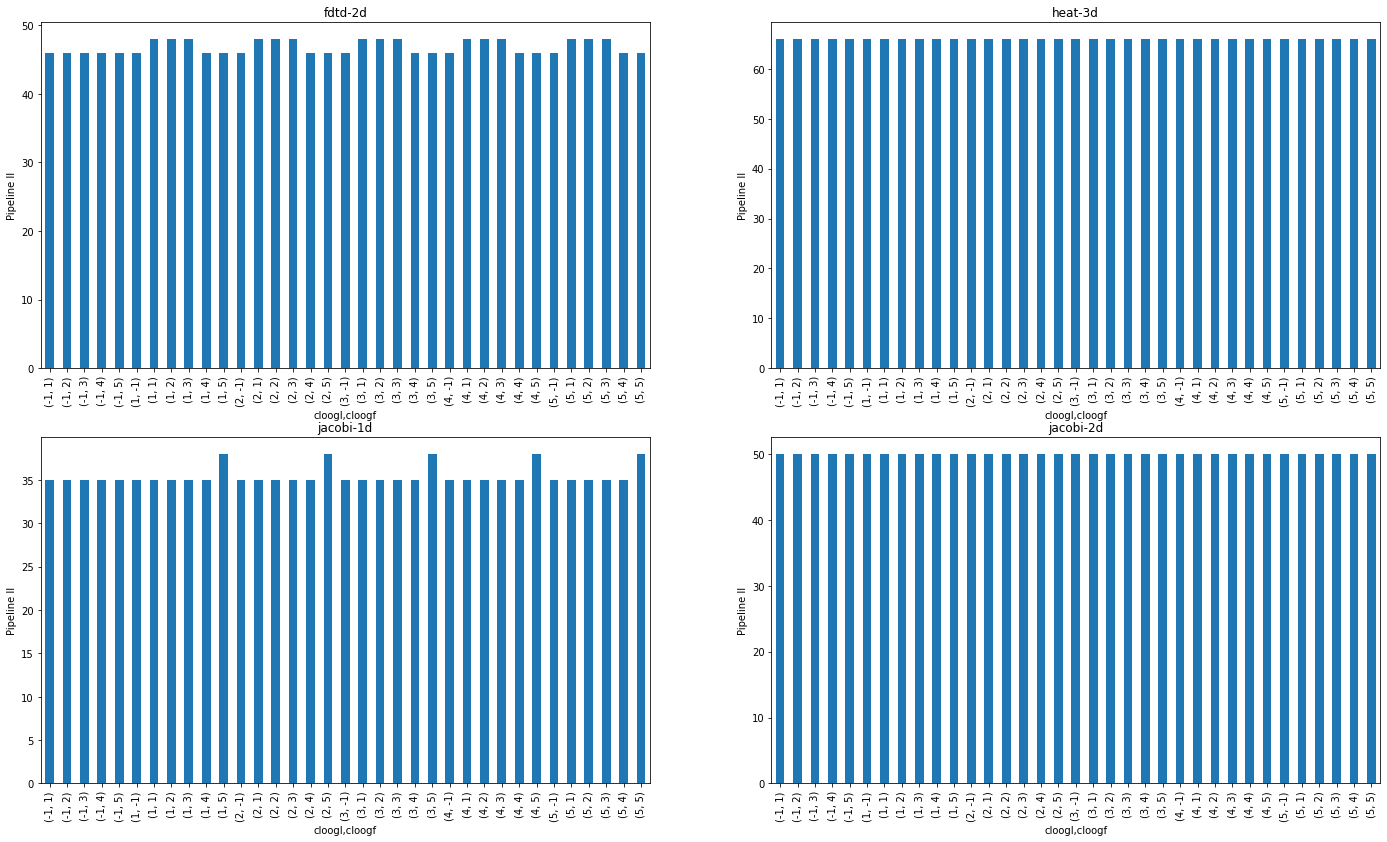

In [30]:
names = df['name'].unique()

N = 2
fig, axes = plt.subplots(len(names) // N, N, figsize=(N * 12, 7 * len(names) // N))
for i, name in enumerate(names):
    ax = axes[i // N, i % N]
    df_ = df[df['name'] == name]
    df_.groupby(['cloogl', 'cloogf'])['pipeline_ii'].max().plot(ax=ax, kind='bar')

    ax.set_title(name)
    ax.set_ylabel('Pipeline II')